In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing()

# TŁUMIENIE
x = sp.Function('x',real=True)
t = sp.Symbol('t',real=True)
w0 = sp.Symbol('omega_0',real=True,positive=True)
z = sp.Symbol('zeta',real=True)
x0 = sp.Symbol('x_0',real=True)
v0 = sp.Symbol('v_0',real=True)

x(t),t,w0,z,x0,v0

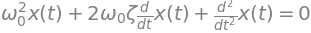

In [2]:
damped = sp.Eq(x(t).diff(t,2)+2*z*w0*x(t).diff(t)+w0**2*x(t), 0)
damped

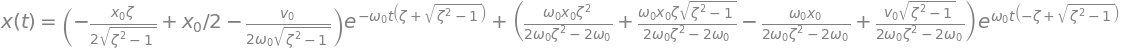

In [3]:
damped_sol = sp.dsolve(x(t).diff(t,2)+2*z*w0*x(t).diff(t)+w0**2*x(t),0,ics={x(0):x0,x(t).diff(t).subs(t,0):v0})
damped_sol

In [4]:
f1 = sp.lambdify(t,damped_sol.rhs.subs({x0:2,v0:-1,w0:2,z:0.05}))
f2 = sp.lambdify(t,damped_sol.rhs.subs({x0:2,v0:-1,w0:2,z:0.25}))
f3 = sp.lambdify(t,damped_sol.rhs.subs({x0:2,v0:-1,w0:2,z:0.5}))

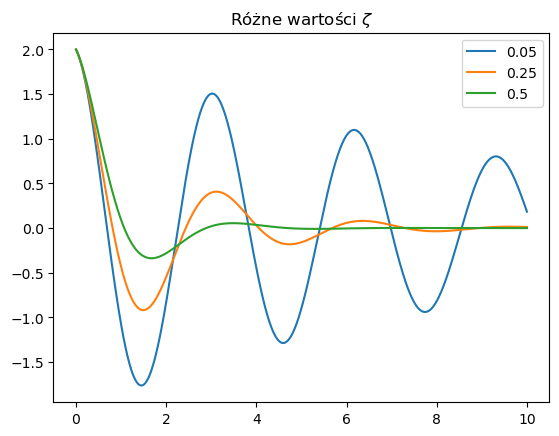

In [5]:
tt = np.linspace(0,10,1000)

plt.plot(tt,np.real(f1(tt)),label='0.05')
plt.plot(tt,np.real(f2(tt)),label='0.25')
plt.plot(tt,np.real(f3(tt)),label='0.5')
plt.title(r'Różne wartości $\zeta$')
plt.legend()
plt.show()

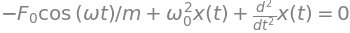

In [6]:
# WYMUSZENIE
x = sp.Function('x',real=True)
t = sp.Symbol('t',real=True)
w0 = sp.Symbol('omega_0',real=True,positive=True)
w = sp.Symbol('omega',real=True)
m = sp.Symbol('m',real=True,positive=True)
F0 = sp.Symbol('F_0',real=True)
x0 = sp.Symbol('x_0',real=True)
v0 = sp.Symbol('v_0',real=True)

driven = sp.Eq(x(t).diff(t,2)+w0**2*x(t)-F0/m*sp.cos(w*t),0)
driven

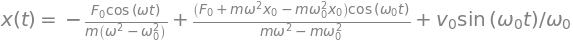

In [7]:
driven_sol = sp.dsolve(x(t).diff(t,2)+w0**2*x(t)-F0/m*sp.cos(w*t),0,ics={x(0):x0,x(t).diff(t).subs(t,0):v0})
driven_sol

In [8]:
f4 = sp.lambdify(t,driven_sol.rhs.subs({x0:10,v0:-1,w0:2,w:10,m:1,F0:10}))
f5 = sp.lambdify(t,driven_sol.rhs.subs({x0:10,v0:-1,w0:2,w:5,m:1,F0:10}))
f6 = sp.lambdify(t,driven_sol.rhs.subs({x0:10,v0:-1,w0:2,w:3,m:1,F0:10}))

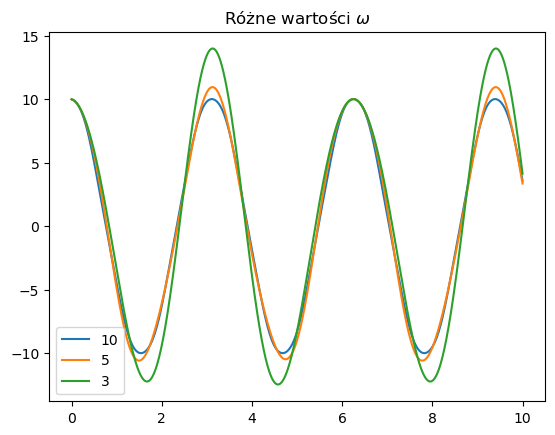

In [9]:
tt = np.linspace(0,10,1000)
plt.plot(tt,np.real(f4(tt)),label='10')
plt.plot(tt,np.real(f5(tt)),label='5')
plt.plot(tt,np.real(f6(tt)),label='3')
plt.title(r'Różne wartości $\omega$')
plt.legend()
plt.show()

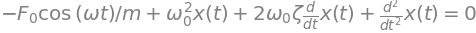

In [10]:
# TŁUMIENIE I WYMUSZENIE
x = sp.Function('x',real=True)
t = sp.Symbol('t',real=True)
w0 = sp.Symbol('omega_0',real=True,positive=True)
w = sp.Symbol('omega',real=True)
m = sp.Symbol('m',real=True,positive=True)
F0 = sp.Symbol('F_0',real=True)
z = sp.Symbol('zeta',real=True)
x0 = sp.Symbol('x_0',real=True)
v0 = sp.Symbol('v_0',real=True)

damped_driven = sp.Eq(x(t).diff(t,2)+2*z*w0*x(t).diff(t)+w0**2*x(t)-F0/m*sp.cos(w*t),0)
damped_driven

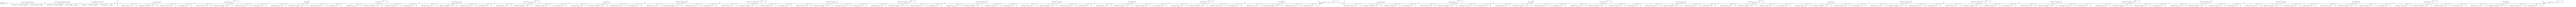

In [11]:
dd_sol = sp.dsolve(x(t).diff(t,2)+2*z*w0*x(t).diff(t)+w0**2*x(t)-F0/m*sp.cos(w*t),0,ics={x(0):x0,x(t).diff(t).subs(t,0):v0})
dd_sol

In [12]:
f7 = sp.lambdify(t,dd_sol.rhs.subs({x0:1,v0:-1,w0:2,w:1,m:1,F0:2,z:0.04}))
f8 = sp.lambdify(t,dd_sol.rhs.subs({x0:1,v0:-1,w0:2,w:1.99,m:1,F0:2,z:0.1}))
f9 = sp.lambdify(t,dd_sol.rhs.subs({x0:1,v0:-1,w0:2,w:1,m:1,F0:2,z:1.5}))

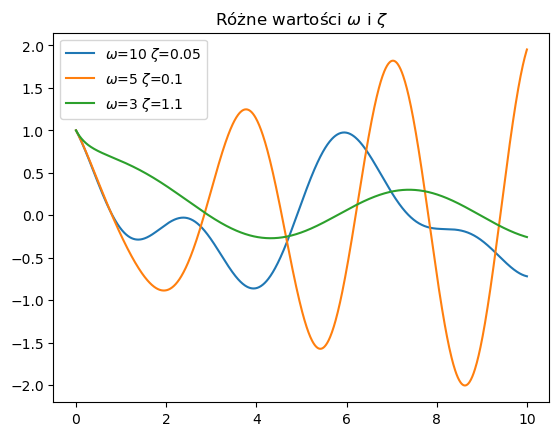

In [13]:
tt = np.linspace(0,10,1000)
plt.plot(tt,np.real(f7(tt)),label=r'$\omega$=10 $\zeta$=0.05')
plt.plot(tt,np.real(f8(tt)),label=r'$\omega$=5 $\zeta$=0.1')
plt.plot(tt,np.real(f9(tt)),label=r'$\omega$=3 $\zeta$=1.1')
plt.title(r'Różne wartości $\omega$ i $\zeta$')
plt.legend()
plt.show()